In [1]:
import joblib
import matplotlib.pyplot as plt
from scaler import Scaler
import numpy as np
from matplotlib.pyplot import figure

In [2]:
with open("sapbert_chpo_query_disorder_dictionary_train_sample.joblib",'rb') as f:
    dataset = joblib.load(f)

In [3]:
sparse_score = np.array(dataset['tfidf_scores'])
dense_score = np.array(dataset['bert_scores'])
labels = np.array(dataset['labels'])

In [4]:
def scale(sparse_score,dense_score,labels, random =100, topk=10, method= 'weighted'):
    x = sparse_score[random]
    y = dense_score[random]
    name = labels[random]
    scaler= Scaler()
    dense_ratio = 32
    sparse_ratio = 4.5
    if method == 'weighted':
        y = y*dense_ratio
        x = x*sparse_ratio
        index = np.argsort(x+y)[::-1][:topk]
        x,y,name = x[index],y[index],name[index]
    elif method == 'min-max':
        y = scaler.min_max(y)
        x = scaler.min_max(x)
        index = np.argsort(x+y)[::-1][:topk]
        x,y,name = x[index],y[index],name[index]
    elif method == 'tanh':
        y = scaler.tanh(y)
        x = scaler.tanh(x)
        index = np.argsort(x+y)[::-1][:topk]
        x,y,name = x[index],y[index],name[index]
    elif method == 'zscore':
        y = scaler.zscore(y)
        x = scaler.zscore(x)
        index = np.argsort(x+y)[::-1][:topk]
        x,y,name = x[index],y[index],name[index]
    else:
        index = np.argsort(x+y)[::-1][:topk]
        x,y,name = x[index],y[index],name[index]
    name = np.array([f'{a}pos'if b==1 else f'{a}neg' for a, b in zip(range(1,topk+1),name)])
    return name,x,y

In [5]:
name,x,y = scale(sparse_score,dense_score,labels, random =90, topk=10, method= 'zscore')

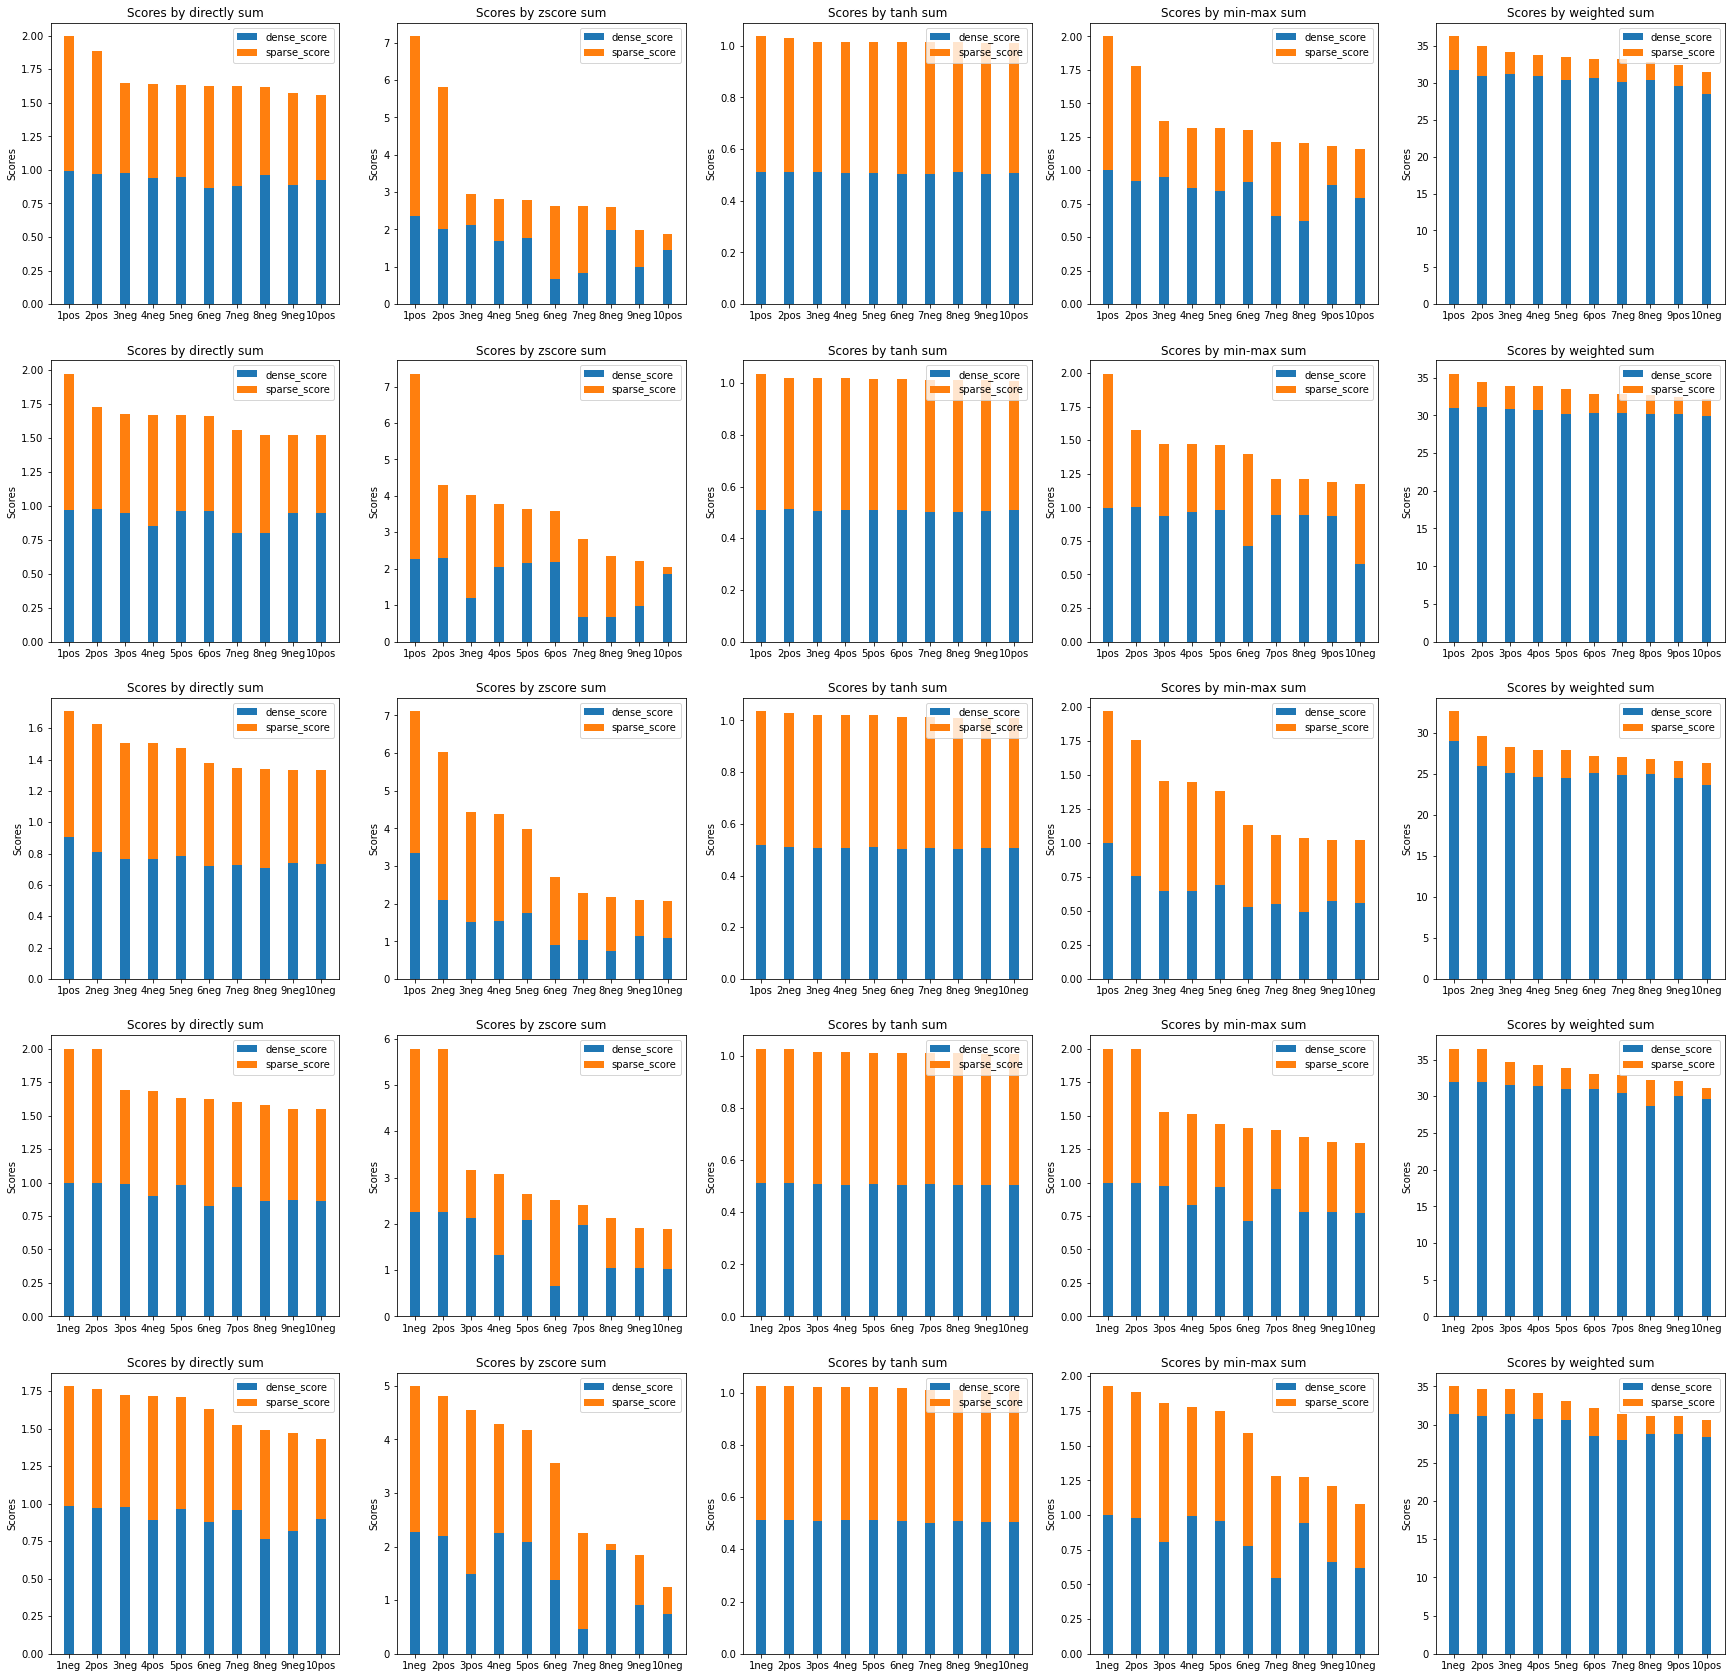

In [10]:
fig, axs = plt.subplots(5,5)
methods = ['directly','zscore','tanh','min-max','weighted']
randoms = randoms = np.random.randint(range(0,5),1000)
for a, random in enumerate(randoms):
       for i, method in enumerate(methods):
              name,x,y = scale(sparse_score,dense_score,labels, random = random, topk=10, method= method)
              width = 0.35
              axs[a,i].bar(name, y, width, label='dense_score')
              axs[a,i].bar(name, x, width, bottom=y,
                     label='sparse_score')
              axs[a,i].set_ylabel('Scores')
              axs[a,i].set_title(f'Scores by {method} sum')
              axs[a,i].legend()
fig.set_figheight(30)
fig.set_figwidth(30)
plt.show()

114,420,755

In [11]:
print(randoms)

[446 231 797 755 695]
